# Startup

In [20]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

%load_ext autoreload
%autoreload 1
%aimport w7x_bes_tools.fida
%aimport w7x_bes_tools.beams
%aimport w7x_bes_tools.sightline
%aimport w7x_bes_tools.sightline_grid
%aimport w7x_bes_tools.signals

save = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# W30 field of view

## Field alignment and Doppler shift

Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Saving plots/S7_W30_w7x_ref_29_vplane.pdf


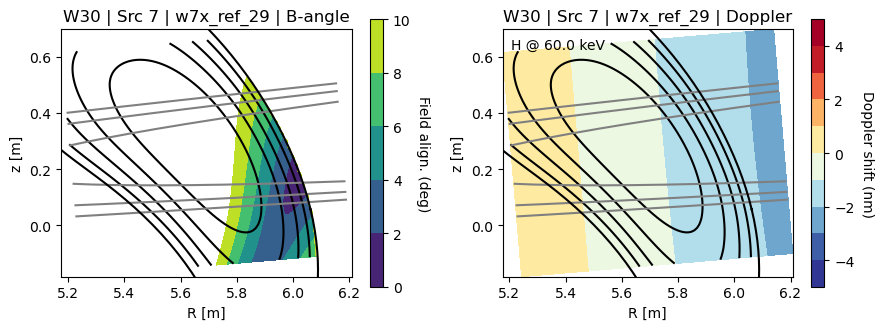

In [3]:
from w7x_bes_tools.beams import HeatingBeam
source = HeatingBeam(source=7, eq_tag='w7x_ref_29')
source.plot_beam_plane(port='W30'', eq_tag='w7x_ref_29', save=save)

## Beam density

FIDASIM results: data/FIDASIM/W30_P7
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/grid3d.hdf5
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Saving plots/fida_beam.pdf
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Saving plots/fida_beam_zoom.pdf


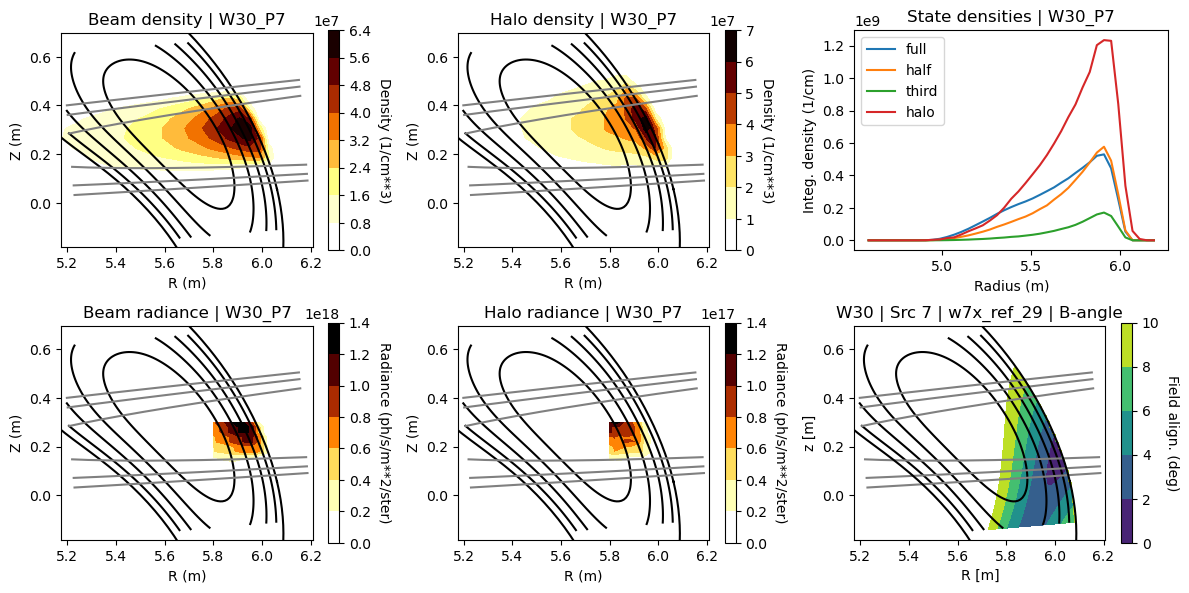

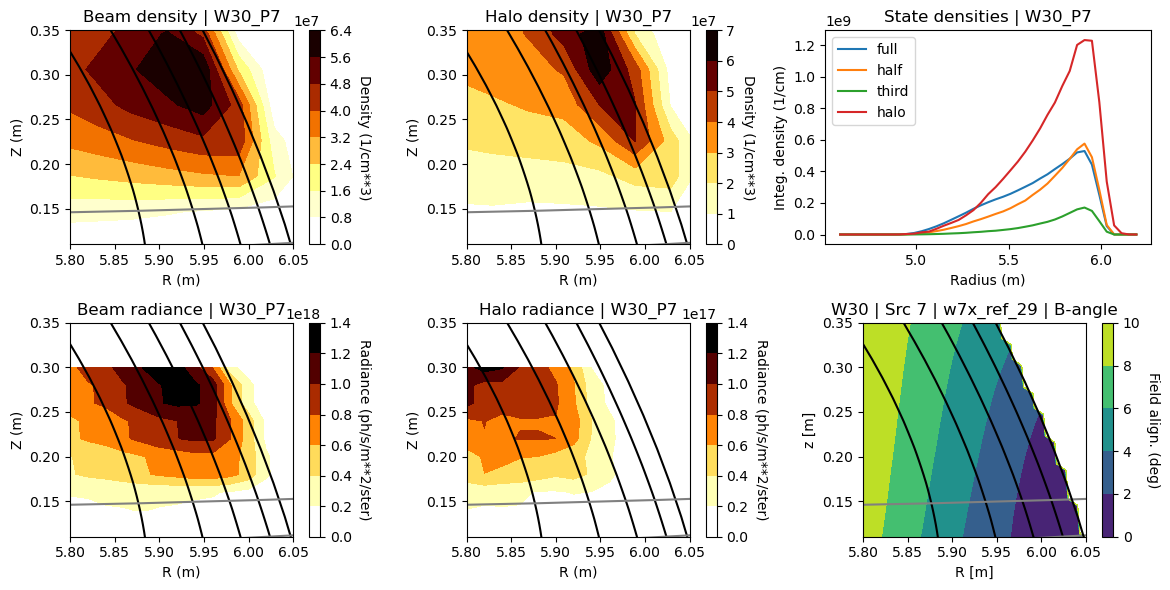

In [15]:
from w7x_bes_tools.fida import Fida
emission_spectra = Fida(simdir='W30_P7')
passband = [653,655.3]
for zoom in [False, True]:
    emission_spectra.plot_beam_plane(passband=passband, zoom=zoom, save=save)

# Sightline grid location

Invalid file data/grid_88_c2c14_P7_W30_R587_Z23_w7x_ref_29.pickle
Calculating sightline grid data
Saving data/grid_88_c2c14_P7_W30_R587_Z23_w7x_ref_29.pickle
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Max rad/binorm excursion (cm): 4.15 2.31
Min/max psinorm: 0.13 0.49
Saving plots/grid_88_c2c14_P7_W30_R587_Z23_w7x_ref_29.pdf
Invalid file data/grid_88_c2c14_P7_W30_R591_Z23_w7x_ref_29.pickle
Calculating sightline grid data
Saving data/grid_88_c2c14_P7_W30_R591_Z23_w7x_ref_29.pickle
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Max rad/binorm excursion (cm): 3.32 2.02
Min/max psinorm: 0.22 0.71
Saving plots/grid_88_c2c14_P7_W30_R591_Z23_w7x_ref_29.pdf
Loaded data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle
Using saved sightline grid data
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 

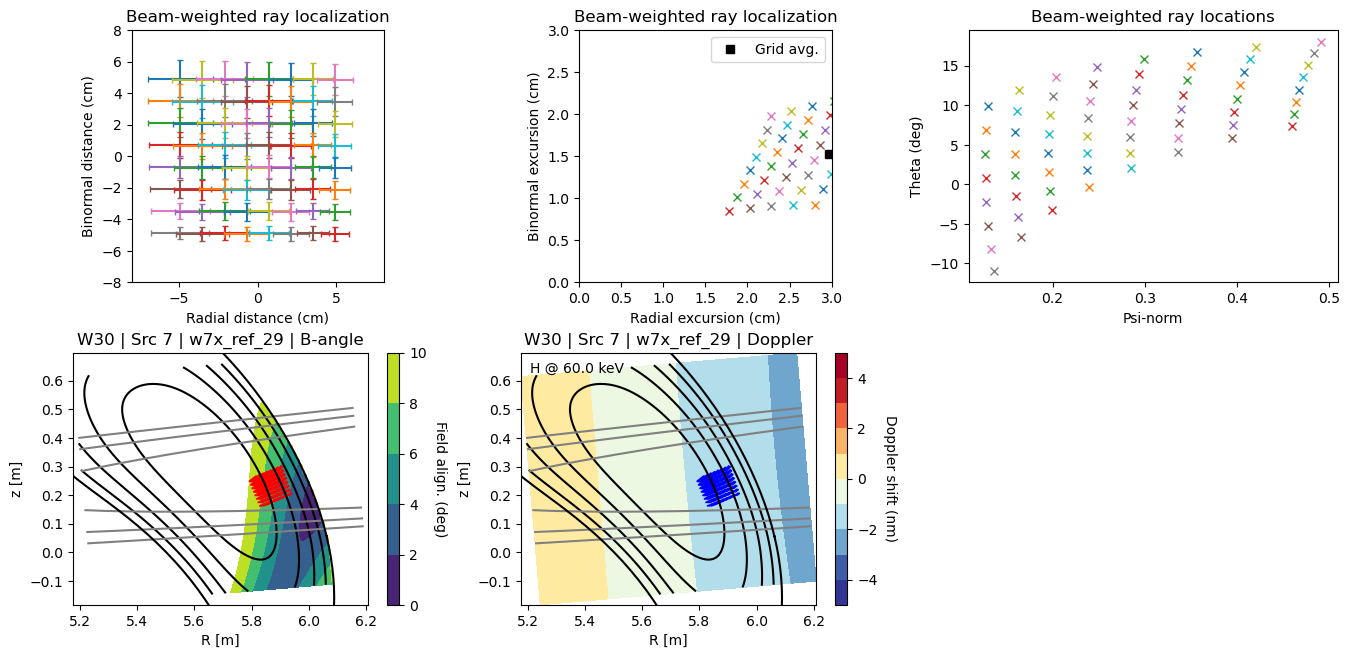

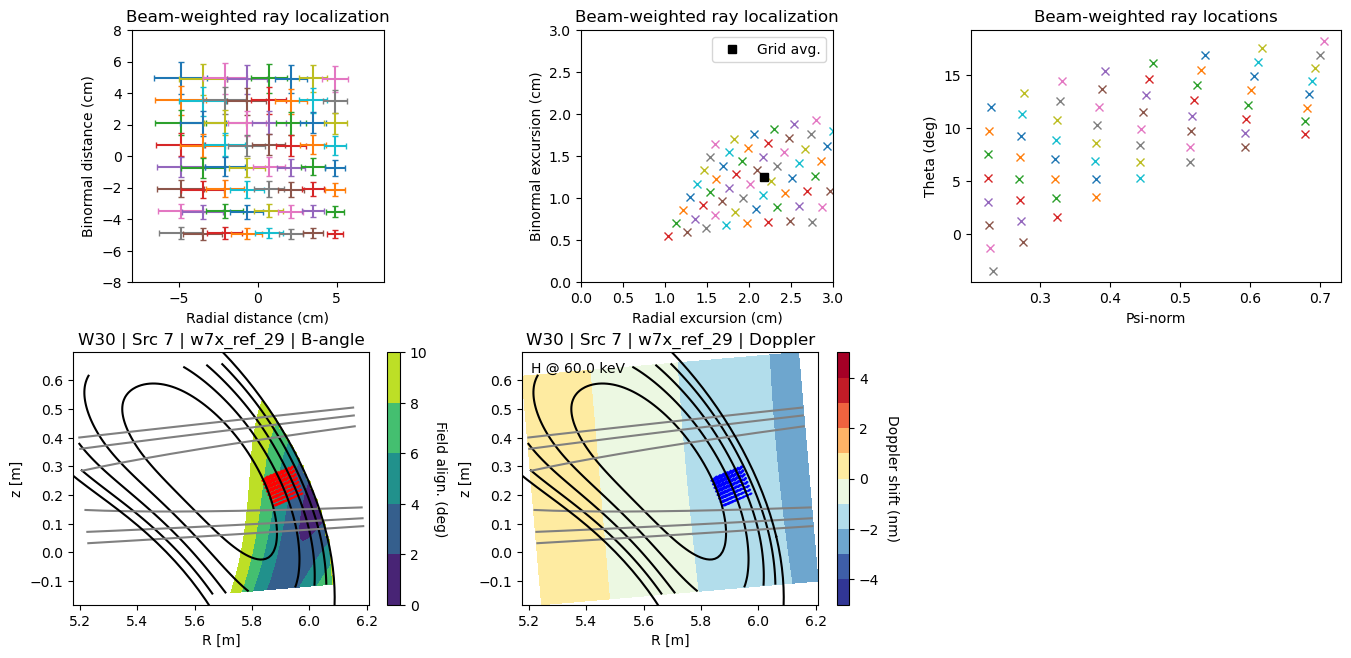

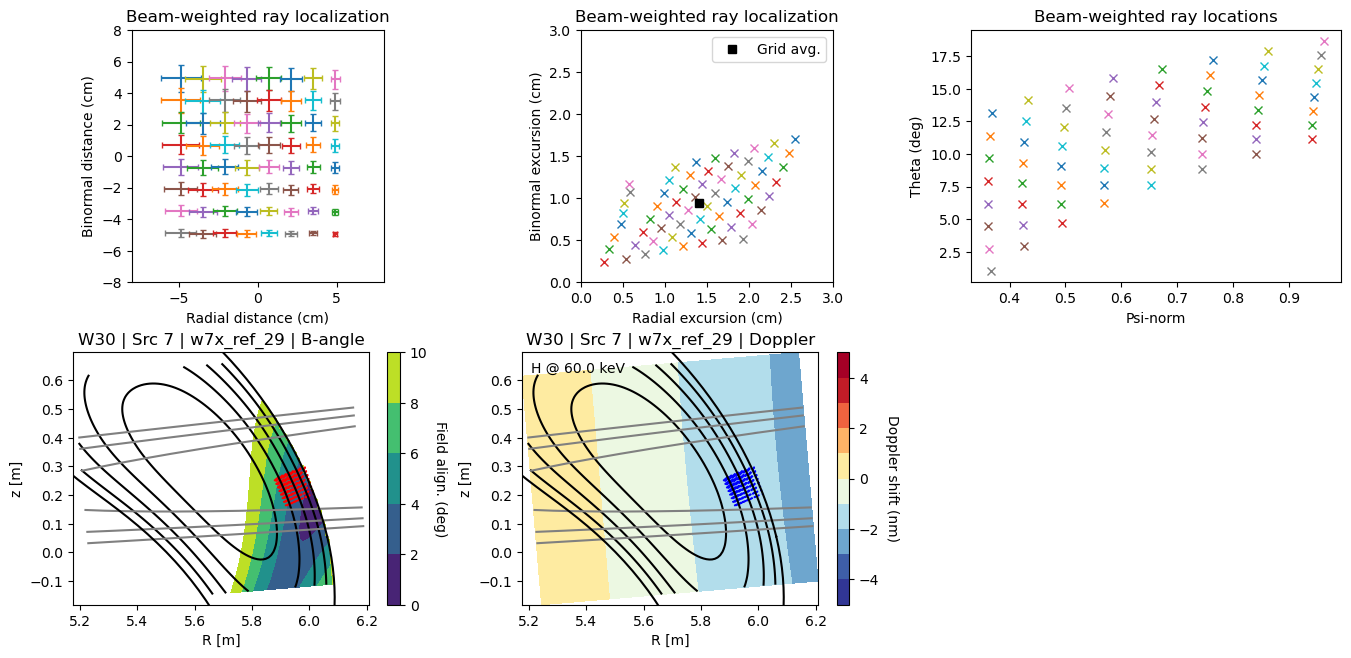

In [17]:
from w7x_bes_tools.sightline_grid import Grid

r_centers = [5.87, 5.91, 5.95]
z_center = 0.23

for r_center in r_centers:
    grid = Grid(beam=source,
                port='W30',
                r_obs=r_center, 
                z_obs=z_center,
                c2c_normal=1.4,
                eq_tag='w7x_ref_29')
    grid.plot(save=True)

# Emission spectra

FIDASIM results: data/FIDASIM/W30_P7
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/grid3d.hdf5
Saving plots/W30_P7_R580_Z22.pdf


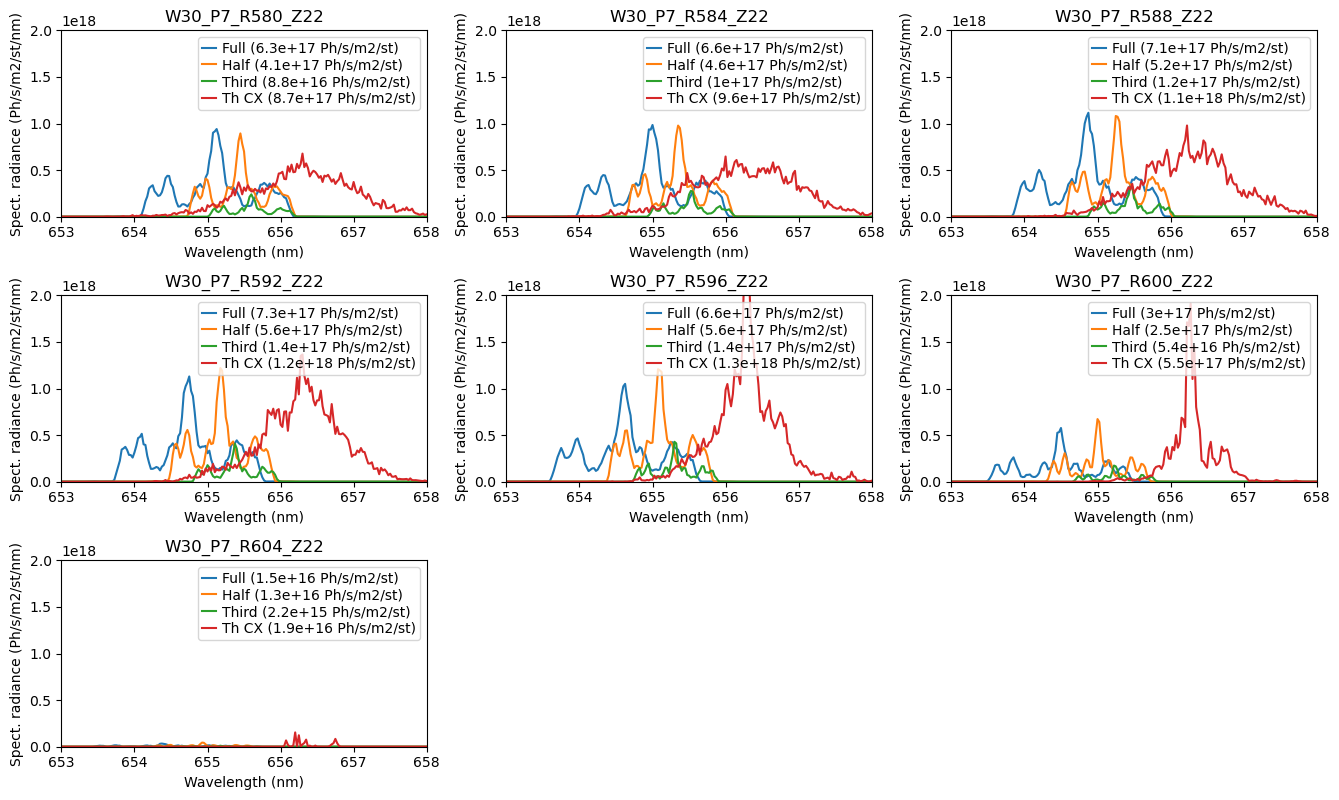

In [18]:
from w7x_bes_tools.fida import Fida
f = Fida(simdir='W30_P7')
ilos = f.los_filter(tag='Z22')
f.plot_spectra(ilos=ilos[::2], save=True)

# Emission radiance

Saving plots/fida_array_W30_P7_R580_Z22.pdf


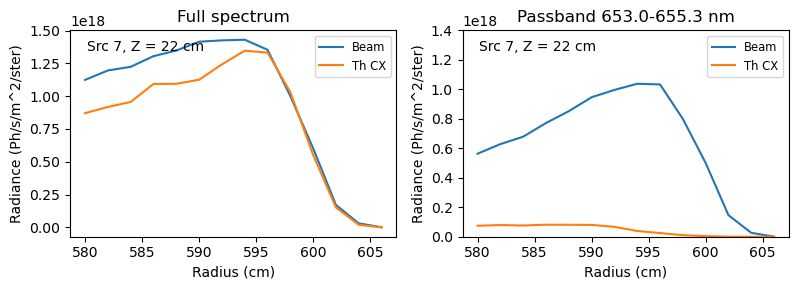

In [19]:
passband = [653,655.3]
f.plot_radial_array(z=22, passband=passband, save=True)

# Optical throughput

Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 4.0 cm
  Numerical aperture: 0.0087
Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 6.0 cm
  Numerical aperture: 0.013
Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 8.0 cm
  Numerical aperture: 0.0174
Saving plots/emitter_etendue.pdf
Saving plots/emitter_etendue.pdf
Saving plots/emitter_etendue.pdf


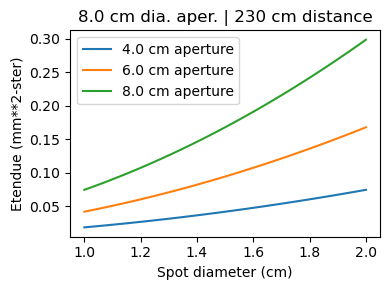

In [25]:
from w7x_bes_tools import signals
import matplotlib.pyplot as plt

apertures = [4, 6, 8]  # aperture diameters in cm
emitters = [signals.Emitter(aperture=aperture) for aperture in apertures]
plt.figure(figsize=(4,3))
for emitter in emitters:
    # emitter.plot_etendue()
    plt.plot(emitter.spot_diameter, emitter.calc_etendue(), label=f"{emitter.aperture:.1f} cm aperture")
    plt.xlabel('Spot diameter (cm)')
    plt.ylabel('Etendue (mm**2-ster)')
    plt.title(f'{emitter.aperture:.1f} cm dia. aper. | {emitter.distance:.0f} cm distance')
    plt.legend()
    plt.tight_layout()

    if save:
        fname = 'plots/emitter_etendue.pdf'
        print(f'Saving {fname}')
        plt.savefig(fname, transparent=True)


# Signal estimation

In [17]:
from w7x_bes_tools import signals

radiance = 0.8e18

apertures = [4, 6, 8]  # cm

diodes = [signals.Diode(aperture=ap) for ap in apertures]

spot_diameter = 1.4  # cm

etendues = [diode.emitter.calc_etendue(spot_diameter) for diode in diodes]


# diode.plot_etendue(save=save)
# diode.plot_diode_response(save=save)

# ne, di_dn_factor = 1e19, 0.75
# print(f'(dI/I)/(dn/n) = {di_dn_factor:.2f} for ne={ne:.1g} #/m**3')
# diode.plot_min_detect_fluctuation(di_dn_factor=di_dn_factor, save=save)

# ne, di_dn_factor = 8e19, 0.55
# print(f'(dI/I)/(dn/n) = {di_dn_factor:.2f} for ne={ne:.1g} #/m**3')
# diode.plot_min_detect_fluctuation(di_dn_factor=di_dn_factor, save=save)

Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 4.0 cm
  Numerical aperture: 0.0087
Diode specificaitons
  Operation temp: -20.0 C
  Reference temp: 20.0 C
  Reference dark current: 0.010 nA
  Responsivity: 0.47 A/W
  Bandwidth: 1.0 MHz
  Feedback resistor: 100.0 MOhm
Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 6.0 cm
  Numerical aperture: 0.013
Diode specificaitons
  Operation temp: -20.0 C
  Reference temp: 20.0 C
  Reference dark current: 0.010 nA
  Responsivity: 0.47 A/W
  Bandwidth: 1.0 MHz
  Feedback resistor: 100.0 MOhm
Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 8.0 cm
  Numerical aperture: 0.0174
Diode specificaitons
  Operation temp: -20.0 C
  Reference temp: 20.0 C
  Reference dark current: 0.010 nA
  Responsivity: 0.47 A/W
  Bandwidth: 1.0 MHz
  Feedback resistor: 100.0 MOhm
